# <center>Предсказание оттока пользователей.</center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## <center> 1. Загрузка и проверка данных. </center>

### 1.1. Загрузка 

In [3]:
data = pd.read_csv('train.csv')

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


### 1.2. Обработка пропусков

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

__Заметим странность__: столбец TotalSpent по идее должен быть числовым, однако имеет тип object

In [5]:
display(data[data['TotalSpent']==' '])

display(data[data['ClientPeriod']==0])

display(data[data['TotalSpent']==0])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


__Вывод:__ TotalSpent пропущен в тех и только тех строках, где ClientPeriod = 0. Если ClientPeriod != 0, то TotalSpent принимает нормальное значение. Причём TotalSpent нигде не равен нулю.

__Решение:__ дабы не терять данные, будет логично заменить пробел на 0, это не противоречит другим записям, посколько объектов с TotalSpent=0 нет. Причем это вписывается в реальность, так как скорее всего - это самые новенькие клиенты, которые, возможно, выбрали некоторый тариф, но еще не платили.

In [6]:
newTotalSpent = [0 if ts == ' ' else ts for ts in data['TotalSpent']]

data['TotalSpent'] = newTotalSpent

data['TotalSpent'] = data['TotalSpent'].astype(float)

len(data[data['TotalSpent']==' '])

0

## <center>2. EDA - исследование данных.</center>

In [7]:
sns.set(style='darkgrid')

### 2.1. Распределение целевой переменной.

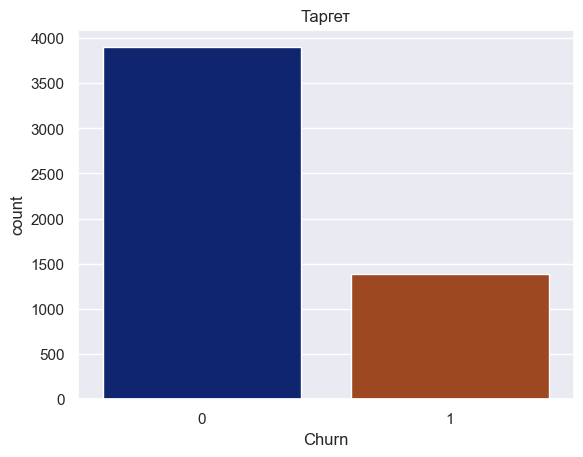

In [8]:
plt.title("Таргет")
sns.countplot(data=data, x='Churn', palette='dark');

__Вывод:__ имеется незначительный дисбаланс классов.

### 2.2. Распределение и корреляция числовых признаков.

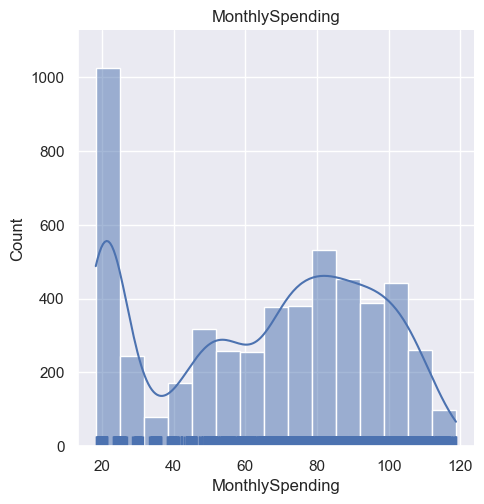

In [9]:
sns.displot(data=data, x='MonthlySpending', bins=15, kde=True, rug=True)
plt.title("MonthlySpending");

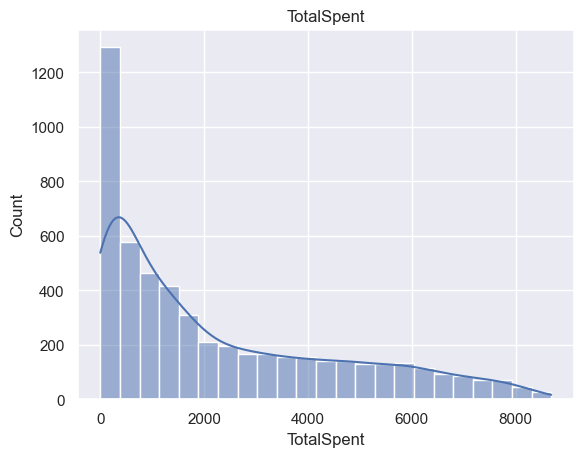

In [10]:
sns.histplot(data=data, x='TotalSpent', kde=True)
plt.title("TotalSpent");

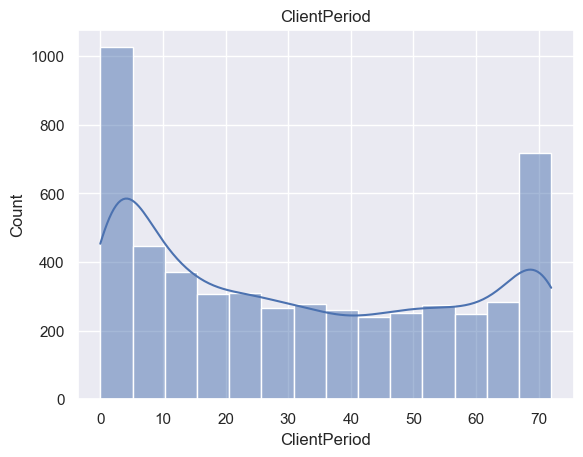

In [11]:
sns.histplot(data=data, x='ClientPeriod', kde=True)
plt.title("ClientPeriod");

Рассчитаем корреляцию данных признаков:

In [12]:
data['TotalSpent'].corr(data['MonthlySpending'])

0.652013918957721

In [13]:
data['TotalSpent'].corr(data['ClientPeriod'])

0.8266579853802869

In [14]:
data['MonthlySpending'].corr(data['ClientPeriod'])

0.2494139719241451

__Вывод:__ присутствует сильная взаимосвязь между ними. Возможно для линейной модели стоит удалить TotalSpent или ClientPeriod.

### 2.3. Распределение категориальных переменных.

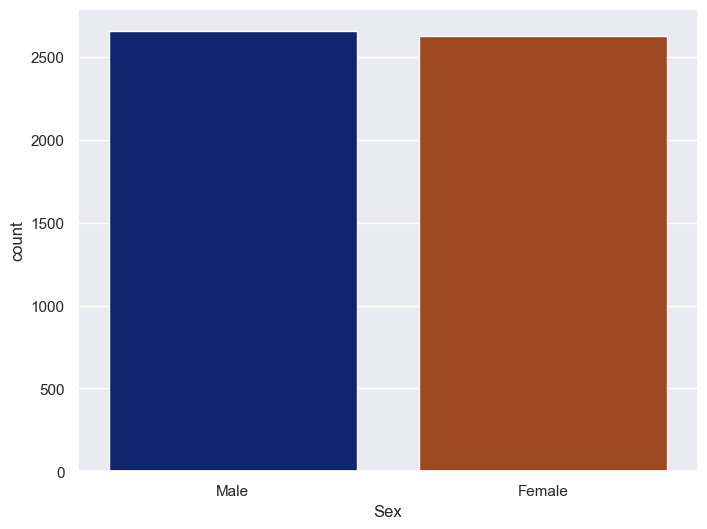

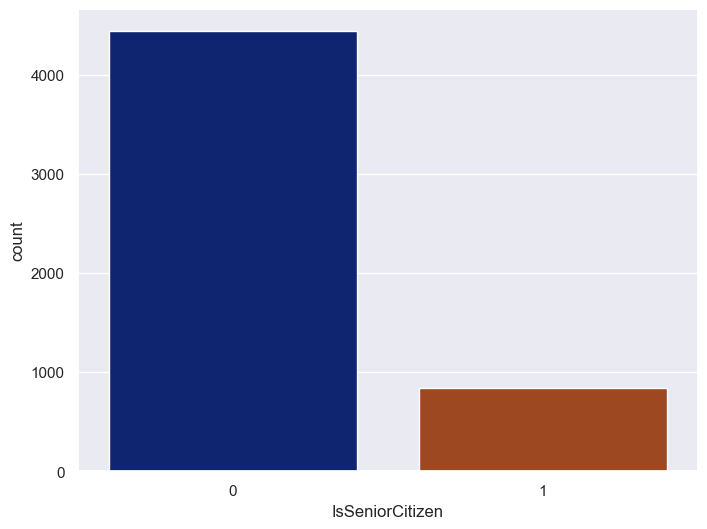

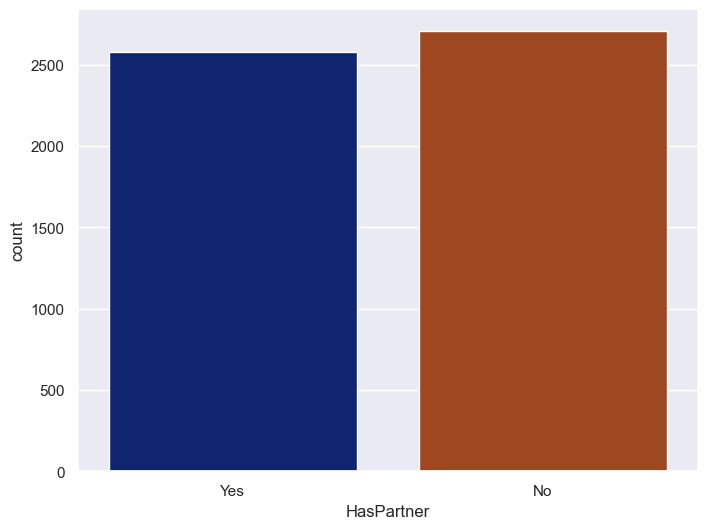

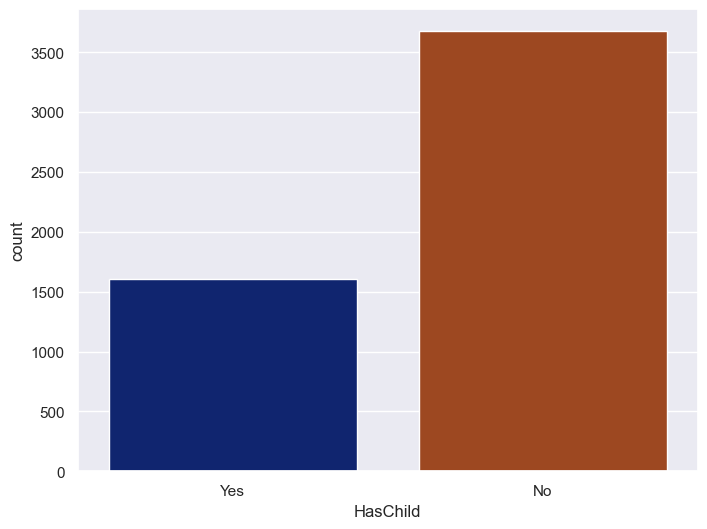

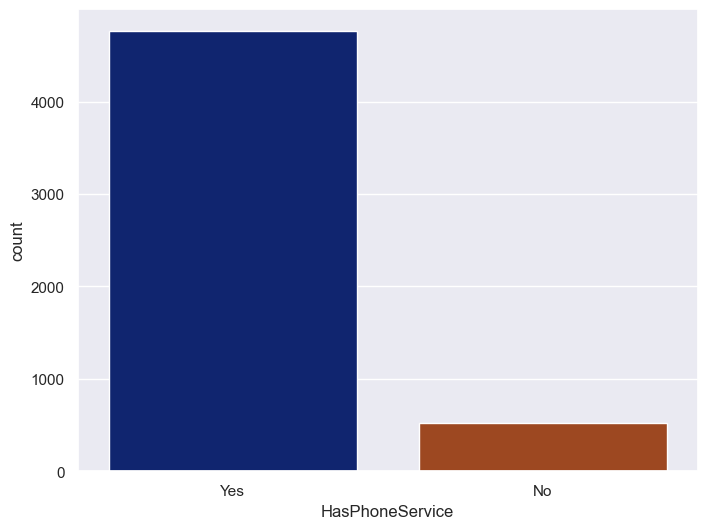

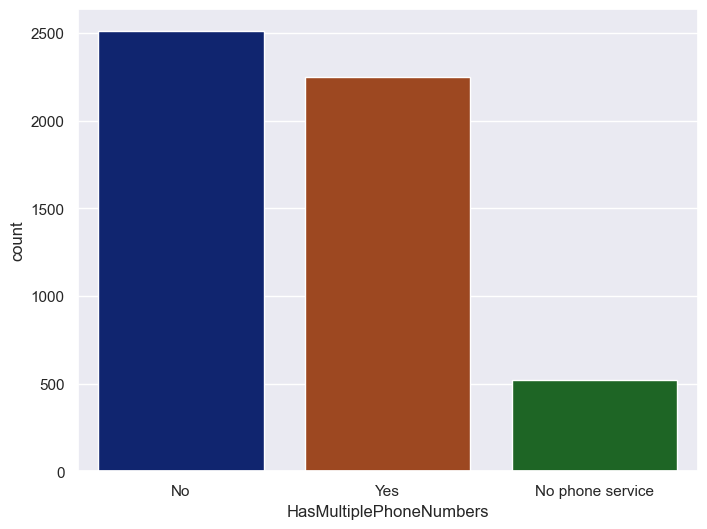

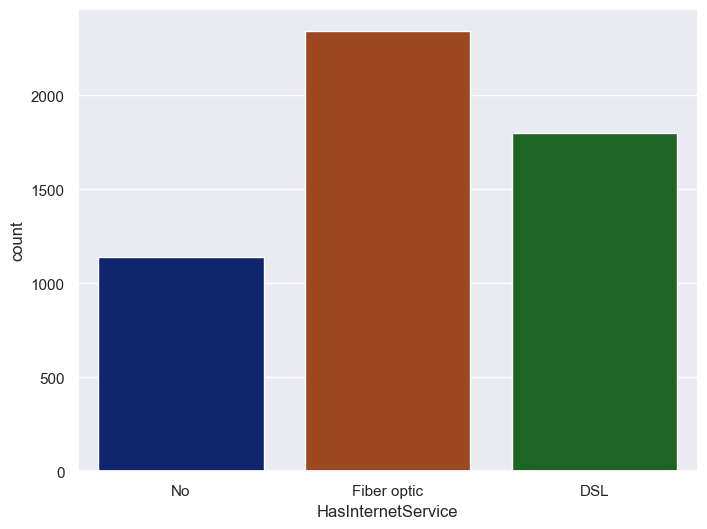

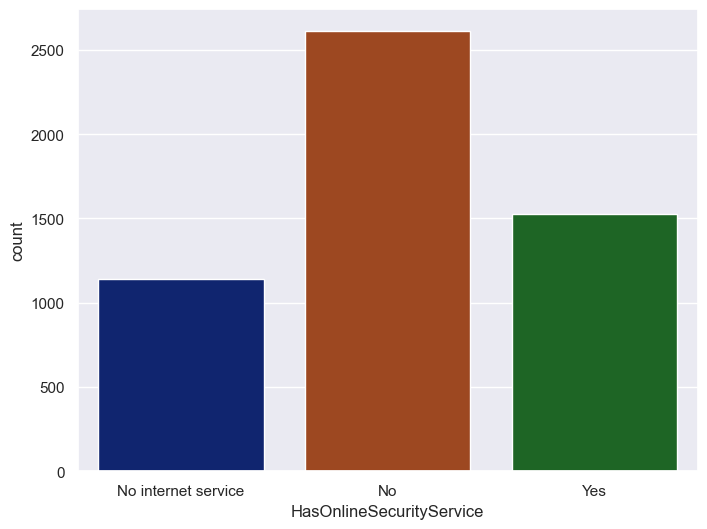

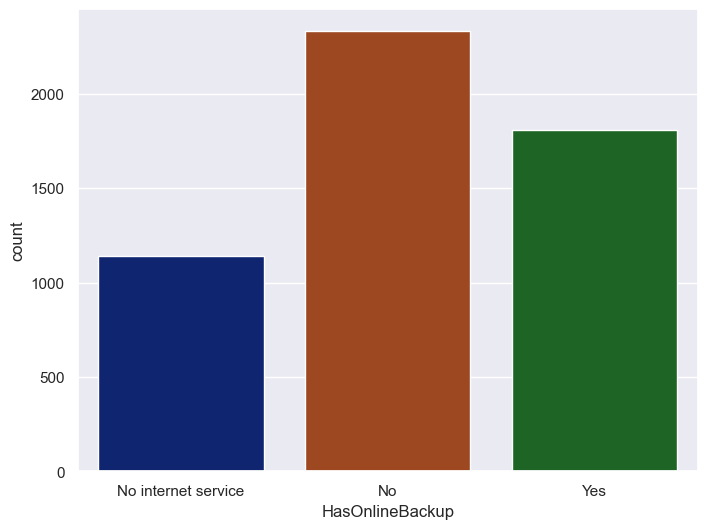

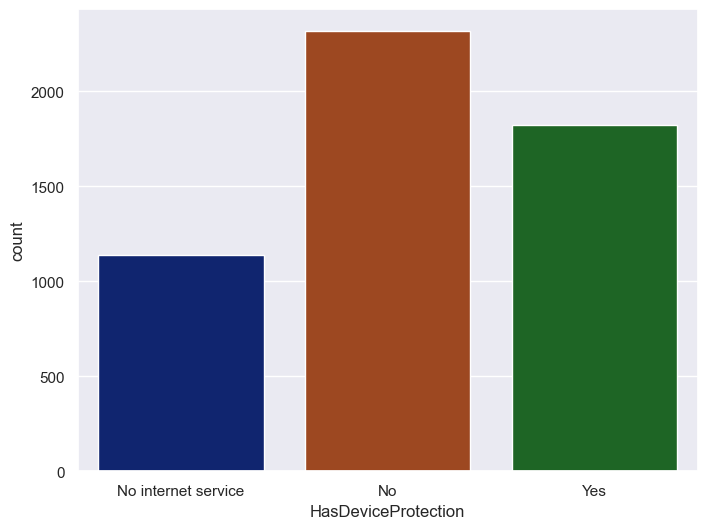

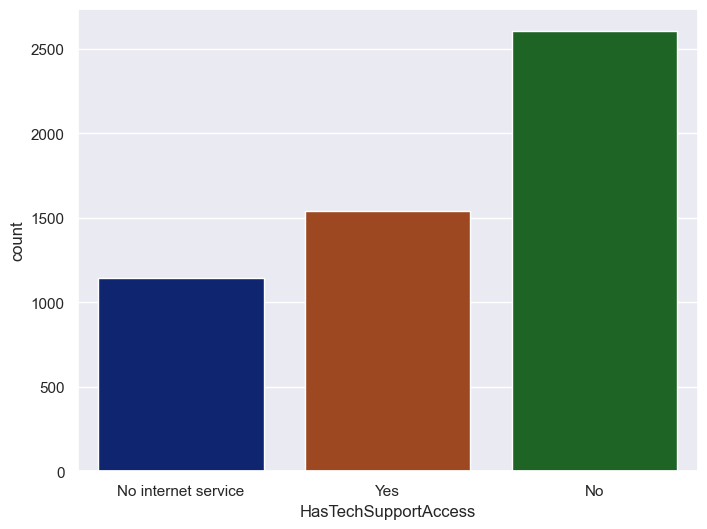

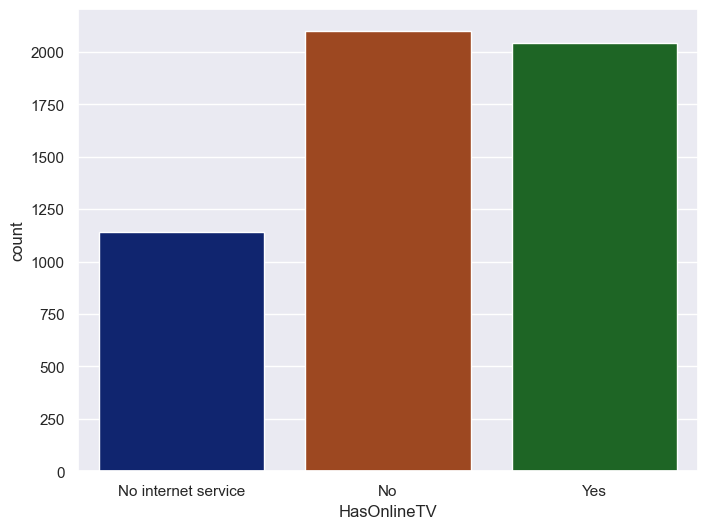

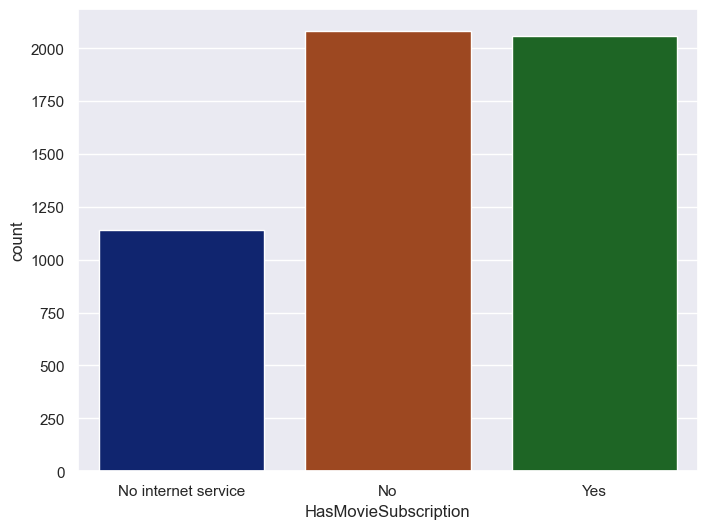

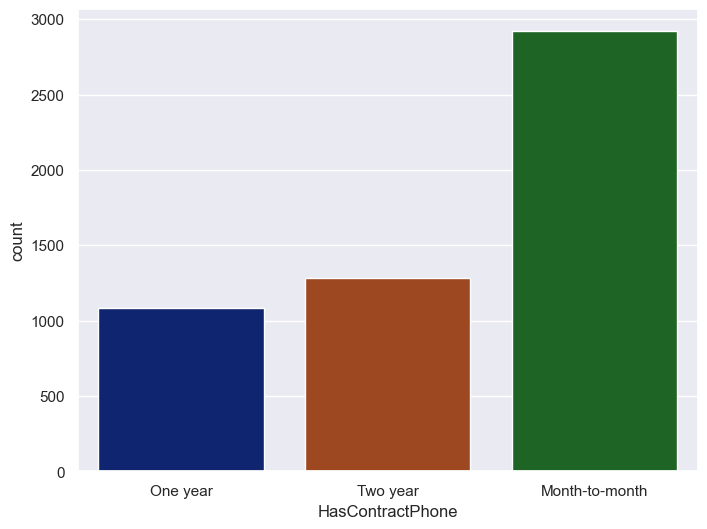

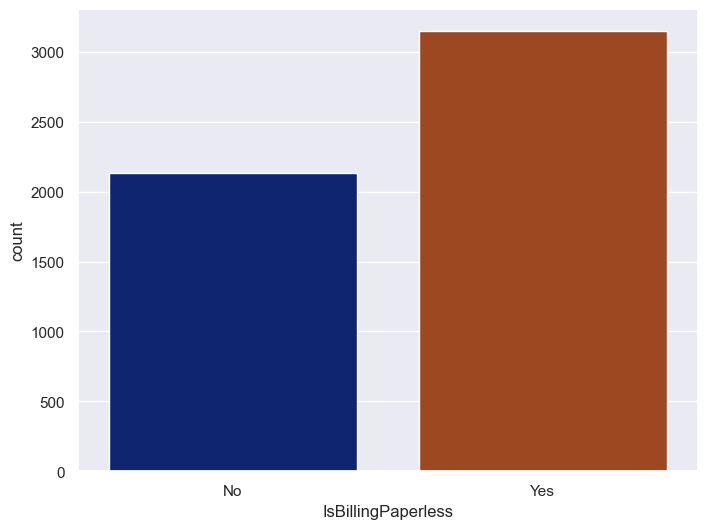

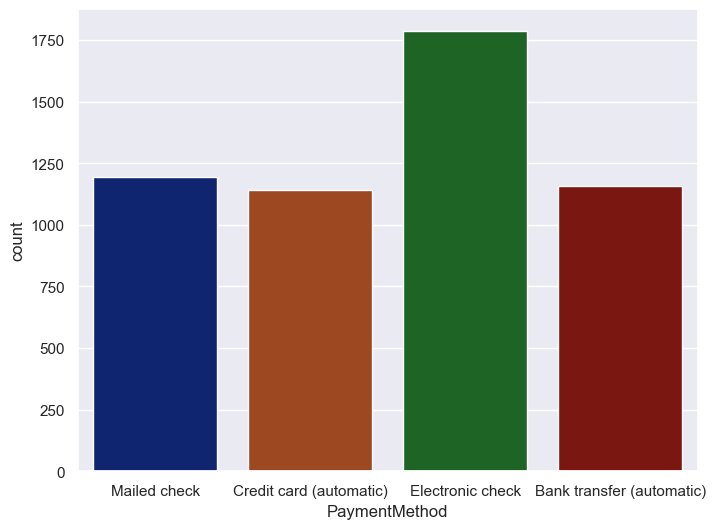

In [15]:
for cat_col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=cat_col, palette="dark")
    plt.show()
    print("\n\n\n\n")

### 2.4. Влияние некоторых признаков на целевую переменную.

### 2.4.1. Влияние численных признаков.

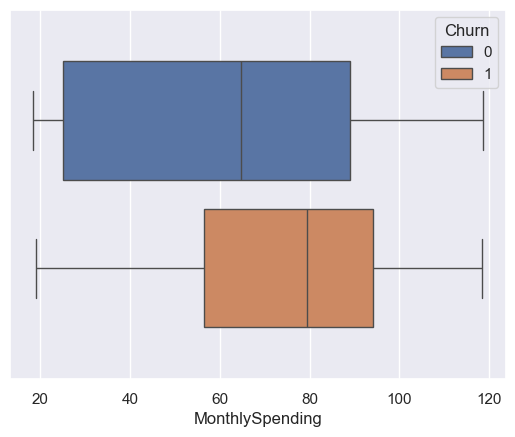

In [16]:
sns.boxplot(data=data, x='MonthlySpending', hue='Churn', gap=0.2);

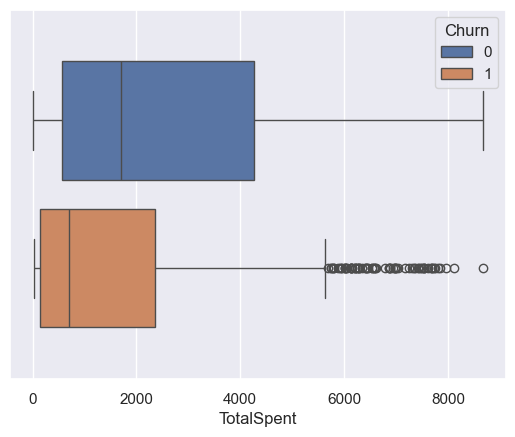

In [17]:
sns.boxplot(data=data, x='TotalSpent', hue='Churn', gap=0.2);

__Наблюдение:__ есть шумовые значения, выбросы, которые выбиваются из общей картины. Можно удалить те записи, в которых класс = 1 и TotalSpent > 6000 для лучшей обобщаемости модели.

In [18]:
# Посмотрим на количество таких выбросов
len(data[(data['Churn']==1 ) & (data['TotalSpent']>6000)])

64

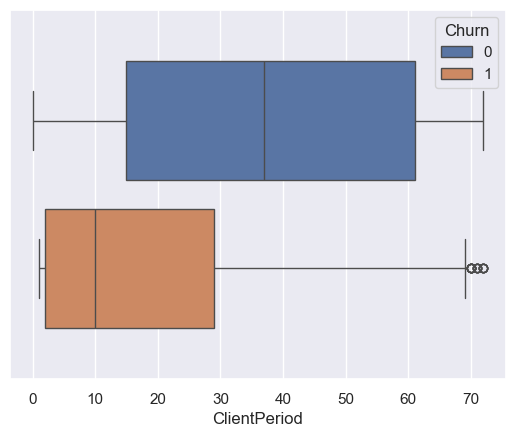

In [19]:
sns.boxplot(data=data, x='ClientPeriod', hue='Churn', gap=0.2);

__Вывод:__ медианное значение ClientPeriod в классе 1 значительно меньше медианного значения класса 0. То есть данный признак может быть важным для различения двух классов.

### 2.4.2. Влияние категориальных переменных на таргет.

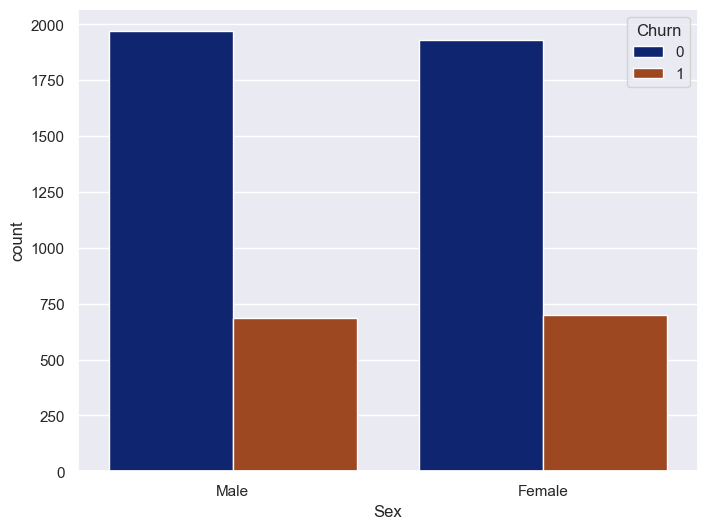

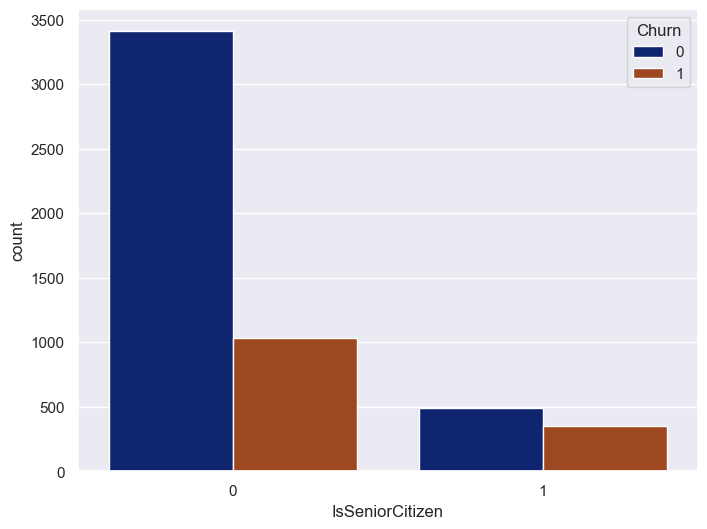

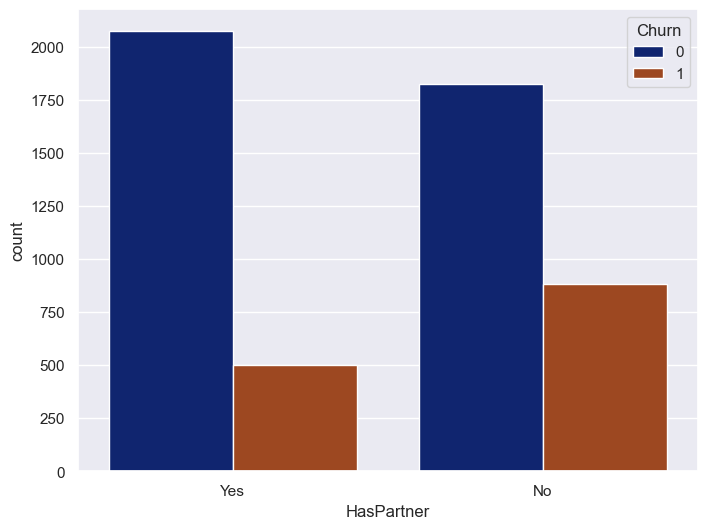

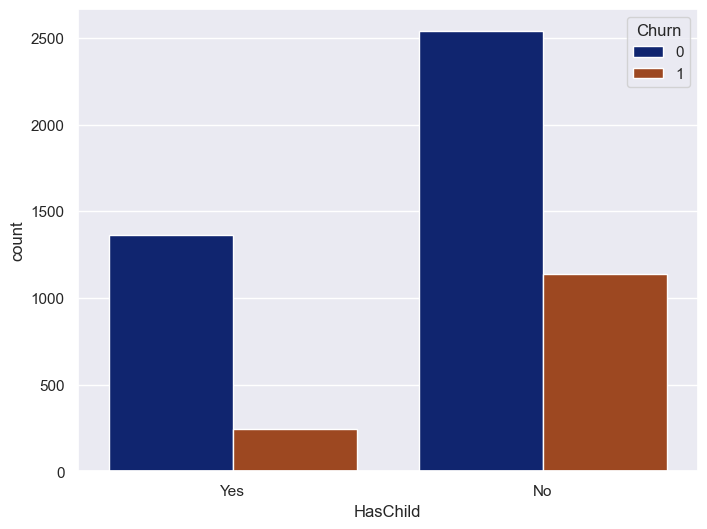

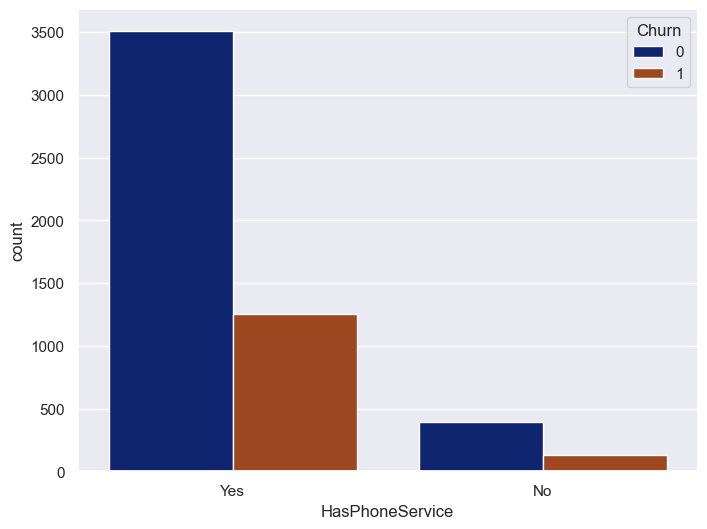

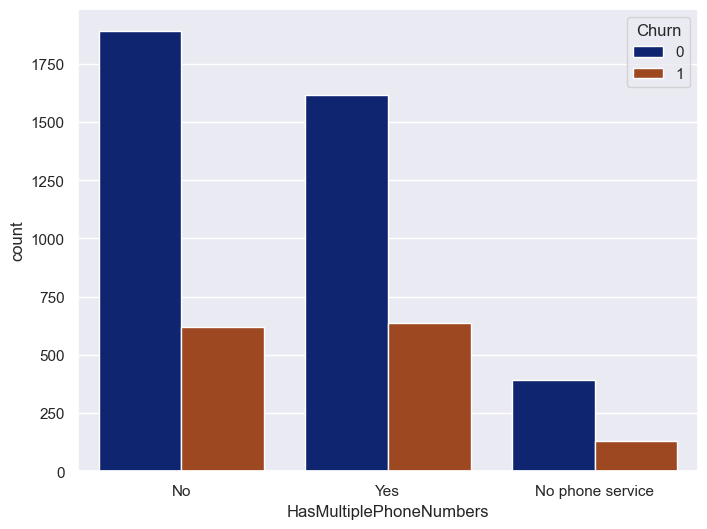

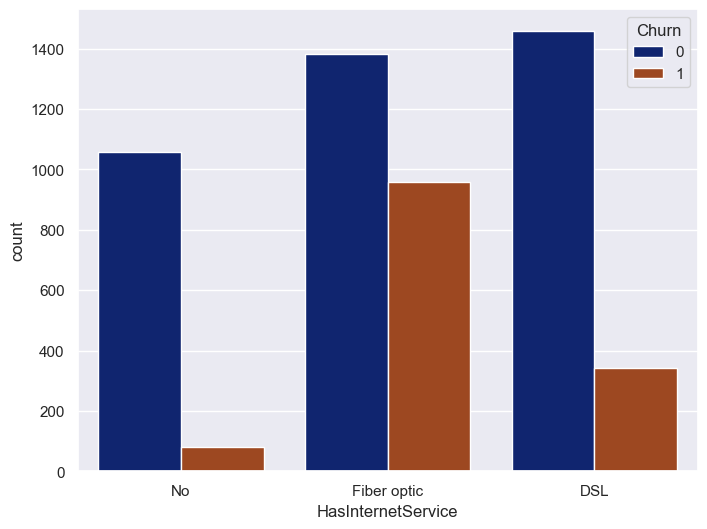

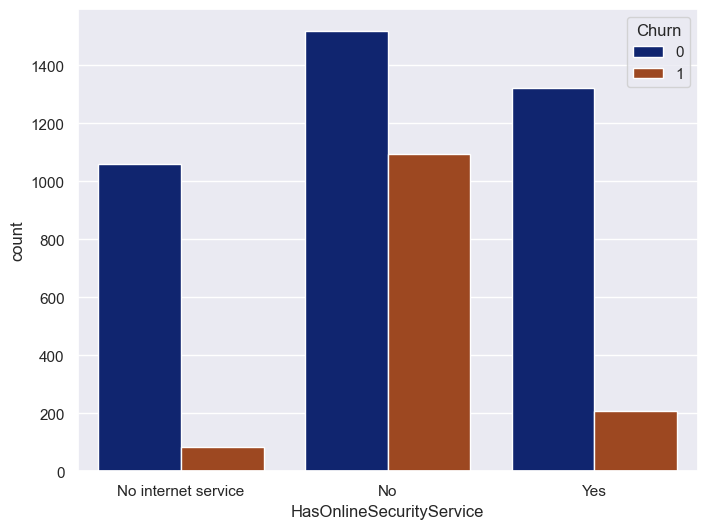

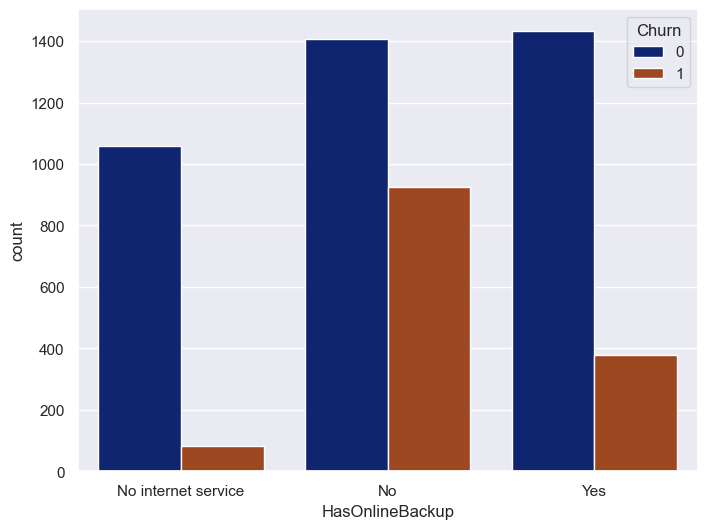

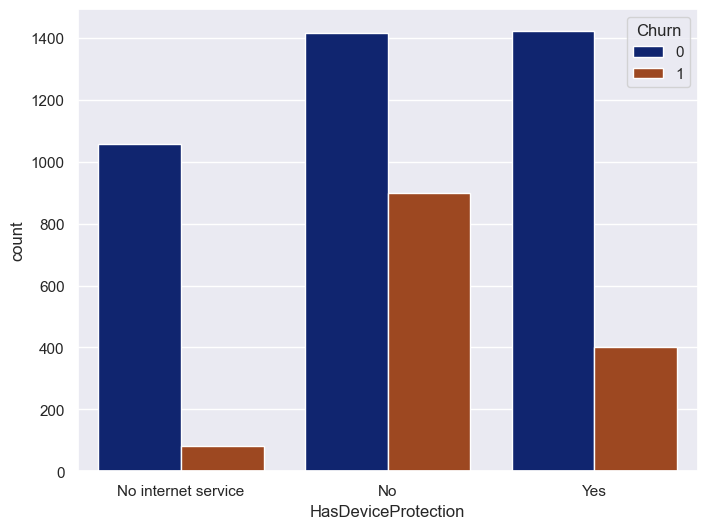

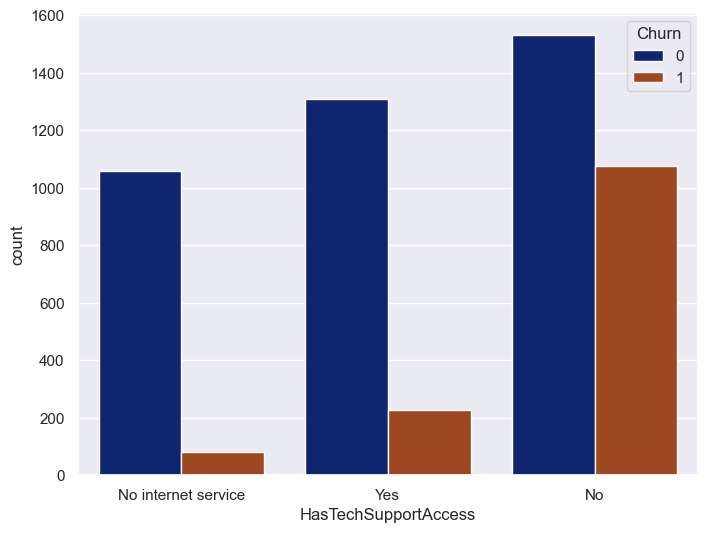

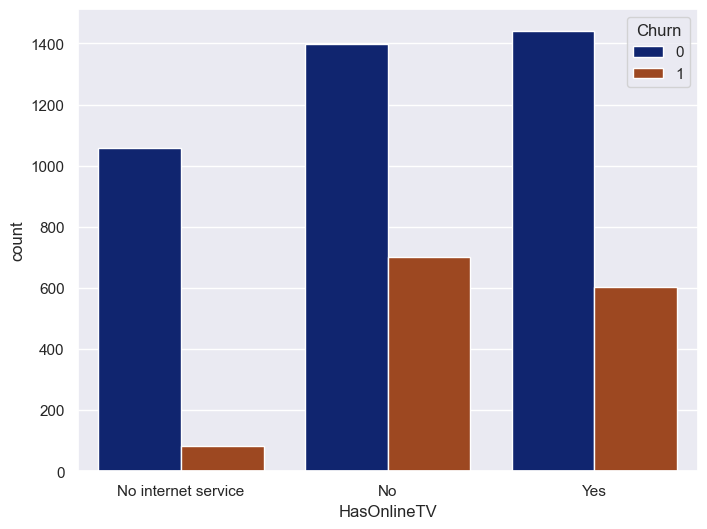

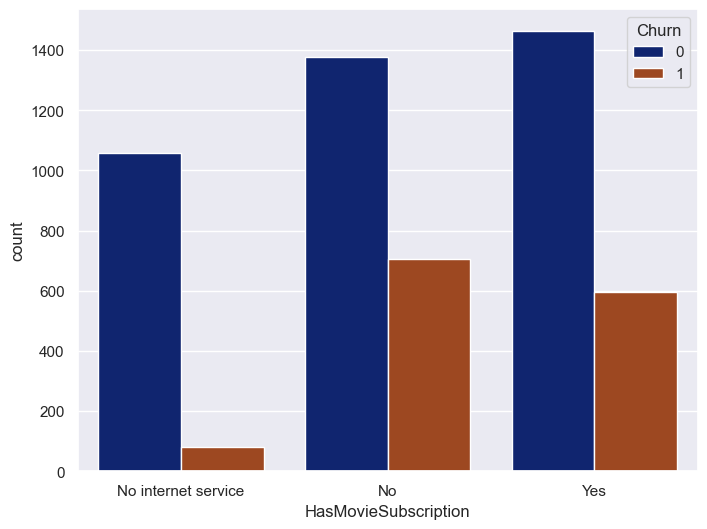

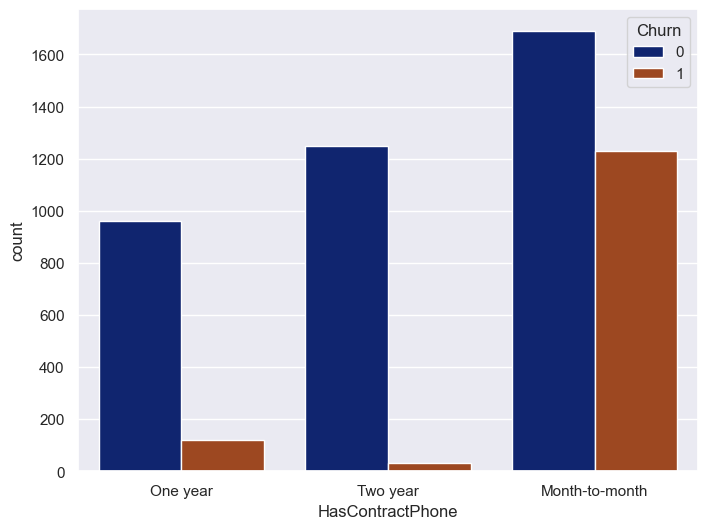

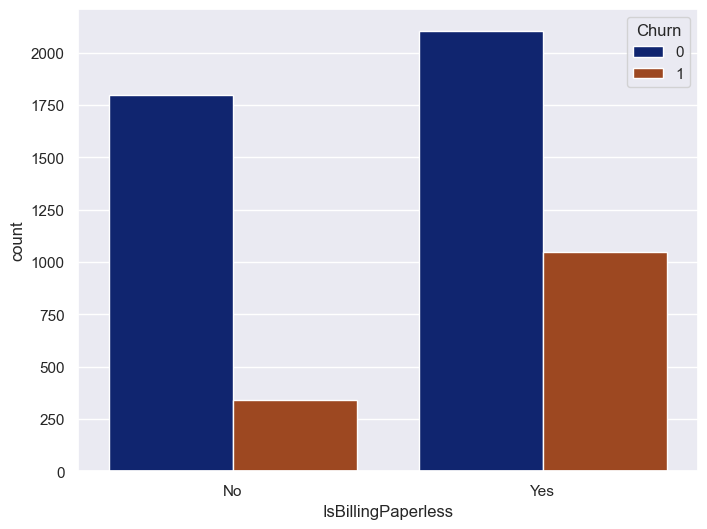

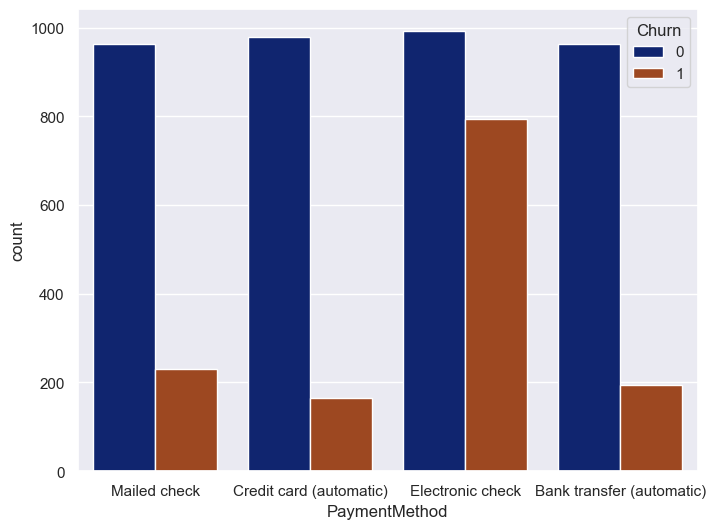

In [20]:
for cat_col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=cat_col, hue='Churn', palette="dark")
    plt.show()
    print("\n\n\n\n")

## 3. Предобработка данных.

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#### OneHotEncoding

In [22]:
one_hot_features = pd.get_dummies(data[cat_cols])
one_hot_features = one_hot_features.astype(int)

In [23]:
X_data = pd.concat([data[num_cols], one_hot_features], axis=1)
Y_data = data["Churn"]

#### Разделение датасета

In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

#### Нормализация численных признаков

In [25]:
num_transformer = StandardScaler()
num_transformer.fit(X_train[num_cols])
X_train[num_cols] = num_transformer.transform(X_train[num_cols])
X_val[num_cols] = num_transformer.transform(X_val[num_cols])

display(X_train.head())
display(X_val.head())

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4556,-0.059488,0.294371,-0.083151,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1468,1.079076,1.172548,1.649755,0,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
3142,1.119739,1.137752,1.642300,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2093,-1.076063,0.304313,-0.827889,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1505,1.607694,-1.322798,-0.186746,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1448,-0.954074,-0.638484,-0.820193,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4792,0.184490,0.188328,0.118388,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
8,0.713109,1.368066,1.344950,0,0,1,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0
3964,0.469131,1.174204,0.921224,0,0,1,1,0,1,0,...,1,0,0,1,1,0,1,0,0,0
240,-0.303466,-1.448725,-0.786614,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0


## <center> 4. Обучение и валидация моделей. </center>

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [27]:
def evaluate(y_pred, proba_pred, y_true):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"F1: {f1_score(y_true, y_pred)}")
    print(f"Roc-Auc: {roc_auc_score(y_true, proba_pred)}")

### 4.1. Логистическая регрессия.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'max_iter': [50, 75, 100, 150, 200, 350, 500],
    'class_weight': ['balanced', {0: 1, 1: 1.25}, {0: 1, 1: 1.5}]
}

grid_log = GridSearchCV(LogisticRegression(random_state=42), 
                        param_grid=log_params, 
                        cv=5,
                       scoring='roc_auc')

grid_log.fit(X_train, Y_train)

best_log = grid_log.best_estimator_
best_log

LogisticRegression(C=10, class_weight={0: 1, 1: 1.5}, max_iter=50,
                   random_state=42)

In [30]:
class_prediction = best_log.predict(X_val)
proba_prediction = best_log.predict_proba(X_val)
proba_prediction = [i[1] for i in proba_prediction]

evaluate(class_prediction, proba_prediction, Y_val)

Accuracy: 0.7615894039735099
F1: 0.5655172413793104
Roc-Auc: 0.8269964259657742


### 4.2. Деревья решений.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree_params = {
    "max_depth": [2, 3, 5, 7, 10, 15, 20],
    "min_samples_leaf": [2, 3, 4, 5, 10],
    'class_weight': ['balanced', {0: 1, 1: 1.25}, {0: 1, 1: 1.5}]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                        param_grid=tree_params, 
                        cv=5,
                        scoring='roc_auc')

grid_tree.fit(X_train, Y_train)

best_tree = grid_tree.best_estimator_
best_tree

DecisionTreeClassifier(class_weight={0: 1, 1: 1.5}, max_depth=5,
                       min_samples_leaf=2, random_state=42)

In [33]:
class_prediction = best_tree.predict(X_val)
proba_prediction = best_tree.predict_proba(X_val)
proba_prediction = [i[1] for i in proba_prediction]

evaluate(class_prediction, proba_prediction, Y_val)

Accuracy: 0.7634815515610217
F1: 0.5567375886524822
Roc-Auc: 0.8126056279495018


### 4.3. SVM.

In [34]:
from sklearn.svm import SVC

In [35]:
svc_params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'class_weight': ['balanced', {0: 1, 1: 1.25}, {0: 1, 1: 1.5}]
}

grid_svc = GridSearchCV(SVC(probability=True,random_state=42), 
                        param_grid=svc_params, 
                        cv=5,
                        scoring='roc_auc')

grid_svc.fit(X_train, Y_train)

best_svc = grid_svc.best_estimator_
best_svc

SVC(C=0.01, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

In [36]:
class_prediction = best_svc.predict(X_val)
proba_prediction = best_svc.predict_proba(X_val)
proba_prediction = [i[1] for i in proba_prediction]

evaluate(class_prediction, proba_prediction, Y_val)

Accuracy: 0.7048249763481551
F1: 0.5873015873015873
Roc-Auc: 0.8214806845152889


### 4.4. Стекинг.

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
estimators = [
    ("Log", best_log),
    ("Tree", best_tree),
    ("SVC", best_svc)
]

final_estimator = GradientBoostingClassifier(n_estimators=20, random_state=42)

stacking_model = StackingClassifier(
    estimators = estimators,
    final_estimator = final_estimator,
    stack_method = "predict_proba"
)

stacking_model.fit(X_train, Y_train)

StackingClassifier(estimators=[('Log',
                                LogisticRegression(C=10,
                                                   class_weight={0: 1, 1: 1.5},
                                                   max_iter=50,
                                                   random_state=42)),
                               ('Tree',
                                DecisionTreeClassifier(class_weight={0: 1,
                                                                     1: 1.5},
                                                       max_depth=5,
                                                       min_samples_leaf=2,
                                                       random_state=42)),
                               ('SVC',
                                SVC(C=0.01, class_weight='balanced',
                                    kernel='linear', probability=True,
                                    random_state=42))],
                   final_estimator=GradientBoostingClassifier(n_estimators=20,
                                                              random_state=42),
                   stack_method='predict_proba')

In [39]:
class_prediction = stacking_model.predict(X_val)
proba_prediction = stacking_model.predict_proba(X_val)
proba_prediction = [i[1] for i in proba_prediction]

evaluate(class_prediction, proba_prediction, Y_val)

Accuracy: 0.7909176915799432
F1: 0.5121412803532008
Roc-Auc: 0.8302195214303525


### 4.5. Градиентный бустинг.

In [40]:
import catboost

In [41]:
X = data[num_cols + cat_cols]
Y = data["Churn"]

In [42]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Обучим модель с гипер-параметрами по умолчанию:

In [43]:
boosting_default = catboost.CatBoostClassifier(cat_features=cat_cols, eval_metric="AUC", silent=True)
boosting_default.fit(X_train, Y_train)

class_prediction = boosting_default.predict(X_val)
proba_prediction = boosting_default.predict_proba(X_val)
proba_prediction = [i[1] for i in proba_prediction]

evaluate(class_prediction, proba_prediction, Y_val)

Accuracy: 0.7767265846736046
F1: 0.5203252032520326
Roc-Auc: 0.823387759625419


#### Переберём парочку вариантов гиперпараметров

In [44]:
n_estimators = [10, 25, 50, 100, 125]
learning_rate = [0.1, 0.01, 0.05, 0.001, 0.005]

In [45]:
max_metric = -1
best_n = 0
best_lr = 0
for i in n_estimators:
    boosting_model = catboost.CatBoostClassifier(n_estimators=i, cat_features=cat_cols, eval_metric="AUC", silent=True)
    boosting_model.grid_search({'learning_rate': learning_rate},
                           X_train,
                           Y_train, refit=True)

    y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
    y_val_predicted = boosting_model.predict_proba(X_val)[:, 1]
    
    train_auc = roc_auc_score(Y_train, y_train_predicted)
    test_auc = roc_auc_score(Y_val, y_val_predicted)
    
    if (test_auc > max_metric):
        max_metric = test_auc
        best_n = i
        best_lr = boosting_model.learning_rate_
        
print(max_metric, best_n, best_lr)


bestTest = 0.81215134
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8121513	best: 0.8121513 (0)	total: 293ms	remaining: 1.17s

bestTest = 0.7892080745
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.7892081	best: 0.8121513 (0)	total: 482ms	remaining: 722ms

bestTest = 0.7913036289
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.7913036	best: 0.8121513 (0)	total: 672ms	remaining: 448ms

bestTest = 0.7886293708
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.7886294	best: 0.8121513 (0)	total: 855ms	remaining: 214ms

bestTest = 0.

## 5. Обучение лучшей модели на всех данных и получение предсказания.

## Подготовка тренировочных данных

In [46]:
data = pd.read_csv('train.csv')

newTotalSpent = [0 if ts == ' ' else ts for ts in data['TotalSpent']]

data['TotalSpent'] = newTotalSpent

data['TotalSpent'] = data['TotalSpent'].astype(float)

In [47]:
one_hot_features = pd.get_dummies(data[cat_cols])
one_hot_features = one_hot_features.astype(int)

X = pd.concat([data[num_cols], one_hot_features], axis=1)
Y = data["Churn"]

In [48]:
num_transformer = StandardScaler()
X[num_cols] = num_transformer.fit_transform(X[num_cols])

In [51]:
stacking_model.fit(X, Y)

StackingClassifier(estimators=[('Log',
                                LogisticRegression(C=10,
                                                   class_weight={0: 1, 1: 1.5},
                                                   max_iter=50,
                                                   random_state=42)),
                               ('Tree',
                                DecisionTreeClassifier(class_weight={0: 1,
                                                                     1: 1.5},
                                                       max_depth=5,
                                                       min_samples_leaf=2,
                                                       random_state=42)),
                               ('SVC',
                                SVC(C=0.01, class_weight='balanced',
                                    kernel='linear', probability=True,
                                    random_state=42))],
                   final_estimator=GradientBoostingClassifier(n_estimators=20,
                                                              random_state=42),
                   stack_method='predict_proba')

## Подготовка тестовых данных

In [53]:
test_data = pd.read_csv('test.csv')

newTotalSpent = [0 if ts == ' ' else ts for ts in test_data['TotalSpent']]

test_data['TotalSpent'] = newTotalSpent

test_data['TotalSpent'] = test_data['TotalSpent'].astype(float)

In [56]:
test_data[num_cols] = num_transformer.transform(test_data[num_cols])

In [58]:
test_cat_features = pd.get_dummies(test_data[cat_cols])

Наборы категориальных фичей в X_test и X_train могут отличаться, поэтому сделаем их идентичными.

In [59]:
X_test_cat = pd.DataFrame()

for column in one_hot_features.columns:
    if column in test_cat_features.columns:
        X_test_cat[column] = test_cat_features[column]
    else:
        X_test_cat[column] = np.array([0]*len(test_data))
        
print(X_test_cat.columns == one_hot_features.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [60]:
X_test = pd.concat([test_data[num_cols], X_test_cat], axis=1)

In [62]:
kaggle_prediction = stacking_model.predict_proba(X_test)

kaggle_prediction_1 = [i[1] for i in kaggle_prediction]

In [64]:
my_submission = pd.DataFrame()
my_submission['Churn'] = kaggle_prediction_1
my_submission.index.name = 'Id'
my_submission.to_csv('my_submission.csv')

#### Результат: 0.8483881653362635